<div style="text-align: center;">
  <img src="https://github.com/Hack-io-Data/Imagenes/blob/main/01-LogosHackio/logo_naranja@4x.png?raw=true" alt="esquema" />
</div>

# Laboratorio: Construcción Modelo de Clasificación y Evaluación de Métricas

Tras realizar el preprocesamiento de los datos y dejarlos listos para construir modelos, ha llegado el momento de dar el siguiente paso: desarrollar tu **primer modelo de clasificación**.

El objetivo de este laboratorio es implementar un modelo de clasificación inicial utilizando **Regresión Logística (Logistic Regression)**. Este modelo te permitirá obtener las primeras predicciones para identificar transacciones normales y anómalas, así como evaluar su desempeño utilizando métricas estándar.

Además, deberás evaluar si el modelo está en riesgo de **overfitting**, asegurando que nuestras predicciones sean consistentes tanto en los datos de entrenamiento como en los de prueba.


## Objetivo del Laboratorio

1. Entrenar un modelo de **Regresión Logística** para predecir si una transacción es "Normal" o "Anómala".

2. Evaluar el desempeño del modelo utilizando métricas como:

   - Precisión (Accuracy).

   - Matriz de confusión.

   - Precisión (Precision), exhaustividad (Recall) y F1-Score.

   - Área bajo la curva ROC (AUC-ROC).

3. Determinar si el modelo presenta **overfitting** o **underfitting**, analizando el rendimiento en los datos de entrenamiento y prueba.


In [ ]:
%load_ext autoreload
%autoreload 2
# para no tener que reiniciar el kernel
# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Visualizaciones
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt

# Funciones
# -----------------------------------------------------------------------
import sys
sys.path.append('../') #pongo los 2 puntos para que salga de la carpeta
import src.funciones as f
import src.soporte_logistica_preprocesamiento as slp
import src.soporte_ajuste_logistica as sal
import src.soporte_logistica_ensamble as sle

# Para realizar la clasificación y la evaluación del modelo
# -----------------------------------------------------------------------
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, cohen_kappa_score

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
df = pd.read_pickle('datos/datos_modelo3.pkl').reset_index(drop=True) # importo mi modelo más importante
df.head()

,transaction_id,customer_id,merchant_id,amount_minmax,is_fraudulent,location,purchase_category,customer_age_minmax,card_type_American Express,card_type_Discover,card_type_MasterCard,card_type_Visa
0,1,1082,2027,0.575423,0,0.500000,0.524125,0.480769,0.0,0.0,1.0,0.0
1,2,1015,2053,0.189301,1,0.529412,0.487760,0.826923,0.0,0.0,0.0,1.0
2,3,1004,2035,0.123960,1,0.596774,0.524125,0.750000,0.0,0.0,1.0,0.0
3,4,1095,2037,0.761671,1,0.596774,0.505952,0.788462,0.0,1.0,0.0,0.0
4,5,1036,2083,0.188153,1,0.497382,0.513711,0.346154,0.0,0.0,1.0,0.0


In [ ]:
df = df.drop(columns=['transaction_id', 'customer_id', 'merchant_id']) # me cargo estas columnas para mi modelo

In [4]:
df['is_fraudulent'].value_counts() # me aseguro que no tengo desbalanceo

is_fraudulent
1    5027
0    4888
Name: count, dtype: int64

# Balanceo

## Regresión Logística

In [80]:
# instanciamos la clase de regresión logistica, desde el src 2 mejorado
logistica_2 = sle.AnalisisModelosClasificacion(dataframe = df, variable_dependiente = "is_fraudulent")

# llamamos a la función para ajustar el modelo
logistica_2.ajustar_modelo("logistic_regression")

# llamamos al metodo para obtener los resultaods de las predicciones
df_lg_2 = logistica_2.calcular_metricas(modelo_nombre =  "logistic_regression" )
df_lg_2.head().T

,train,test
accuracy,0.534796,0.528492
precision,0.534669,0.527592
recall,0.534796,0.528492
f1,0.532421,0.526067
kappa,0.068013,0.053877
auc,0.548724,0.545605
time_seconds,0.003199,NaN
n_jobs,NaN,NaN
tiempo_computacion(segundos),NaN,0.003199
nucleos_usados,NaN,NaN


Veamos qué dicen mis datos:
- Accuracy: como de bien predigo los casos verdaderos. (0.50) Mis datos no superan el 0.53 % por lo que no hacen predicciones correctas para mi modelo.
- Precision: como de seguro estoy de que mis valores positivos predichos son correctos. (0.50) Tengo falsos positivos pero mi precision es baja. Lo veo nuevamente en el heatmap.
- Recall: de todos los casos realmente positivos, cuantos acierta (0.5). En este caso no hay certeza de que acierte los casos positivos ya que apenas supera el 0.5
- F1: relaciona el precision con el recall. 
- Kappa: un Kappa menor que 0.6 ya indica que mis predicciones son al azar. En mi caso, un Kappa de 0.06 nos indica que mis predicciones fueron hechas con mucho azar.

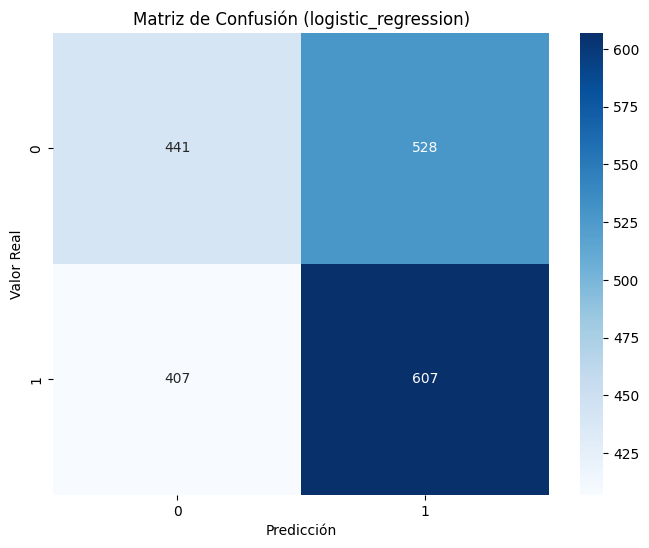

c:\Users\DELL\Git\modelo_clasificacion\src\soporte_logistica_ensamble.py:225: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=importancia_df, palette="viridis")


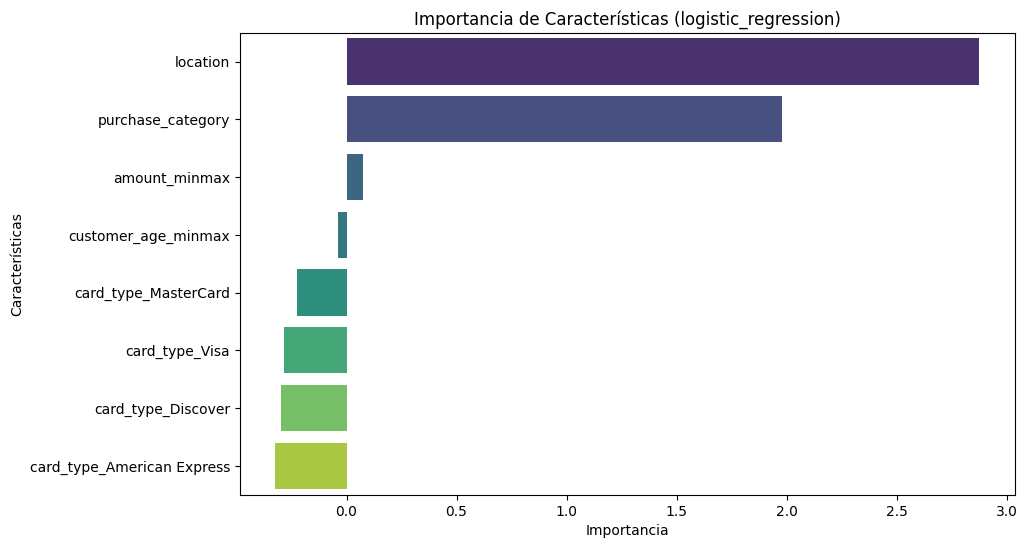

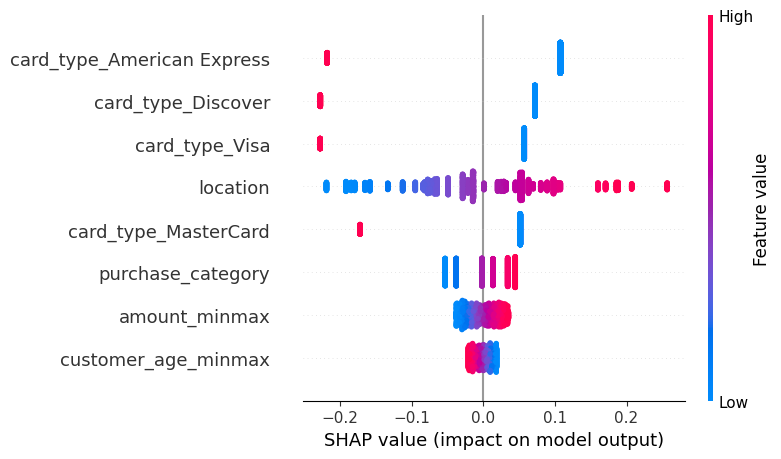

In [81]:
logistica_2.plot_matriz_confusion("logistic_regression")
logistica_2.importancia_predictores(modelo_nombre ='logistic_regression')
logistica_2.plot_shap_summary(modelo_nombre="logistic_regression")

Según mi modelo: 
- La ubicación y la categoría de compra son las variables que más influyen en mi variable respuesta. Esto seguido de mis dos variables numéricas.
- Considerando esto: 
    - El monto no representa un factor tan importante como se esperaría. sin embargo, los omntos mayores son los que ejercen un poco más de influencia a la hora de que se haga una transacción fraudulenta.
    - La edad tiene una relación distinta, la edad del consumidor me indica que aquellos más jóvenes son los que tienen más probabilidad de hacer una transacción fraudulenta.
- Según mi ubicación, aparentemente las ciudades que están categorizadas con un número mayor son las que tienen más probabilidad de ejercer una transacción fradulenta.
- Según la categoría de compra, solo puedo afirmar que aquella con más presencia (gas station) es la que más probabilidad tiene de tener transacciones fraudulentas. Las demás, al tener valores muy similares, no es tan fácil de señalar cuales son las que también se inclinen a esto. Pero sí hay 3 de las 6 categorías que influyen en que la transacción sea fraudulenta.
- Según las tarjetas de crédito: 
    - Sería razonable decir que no usar American Express (valores azules) incrementa la probabilidad de fraude, mientras que usar American Express (valores rosas) reduce esta probabilidad según el modelo.
    - Por contraparte, la tarjeta Master Card es la que no usarla es la que menos probabilidad de que sea fraude pero cuando sí se usa es la que menos seguridad brinda a la hora de probabilidad de que se evite el fraude.

## Random Forest (src):

In [127]:
params_rf = {
    'n_estimators': [100, 250, 500,1000],
    'max_features': [2,4,6,8],
    'max_depth': [5,10,15,20,25],
    'min_samples_split': [6,9,13,15,20],
    'min_samples_leaf': [10,20,30,40,60,80,100], 
    'max_leaf_nodes': [25,35,45,55]
}

In [ ]:
logistica_2.ajustar_modelo('random_forest', param_grid=params_rf)

df_rf_prueba = logistica_2.calcular_metricas(modelo_nombre= 'random_forest')
df_rf_prueba

In [121]:
# llamamos a la función para ajustar el modelo
logistica_2.ajustar_modelo("random_forest")

# llamamos al metodo para obtener los resultaods de las predicciones
df_resultados_rf_2 = logistica_2.calcular_metricas(modelo_nombre =  "random_forest" )
df_resultados_rf_2.head()

C:\Users\DELL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


El mejor modelo es RandomForestClassifier(max_depth=2, min_samples_leaf=2, n_estimators=50)


,accuracy,precision,recall,f1,kappa,auc,time_seconds,n_jobs,tiempo_computacion(segundos),nucleos_usados
train,0.542360,0.543264,0.542360,0.536141,0.082200,0.562473,0.038985,NaN,NaN,NaN
test,0.518911,0.517346,0.518911,0.512012,0.032585,0.528693,NaN,NaN,0.038985,NaN


In [76]:
df_resultados_rf_2.T

,train,test
accuracy,0.542990,0.523954
precision,0.544410,0.522659
recall,0.542990,0.523954
f1,0.535063,0.514405
kappa,0.083143,0.041799
auc,0.563501,0.530230
time_seconds,0.018591,NaN
n_jobs,NaN,NaN
tiempo_computacion(segundos),NaN,0.018591
nucleos_usados,NaN,NaN


Intuitively, this tells us how correct, or precise, are our model's positive predictions. Precision is important when we believe False Positives are more important than False Negatives (e.g. spam detection). Try moving the threshold to see how precision worsens with the increase of False Positives.

It measures how many of the actual positive instances we were able to correctly predict (or recall). Recall is important when we believe False Negatives are more important than False Positives (e.g. our problem of cancer detection).

### Decision Tree src ensamble

El mejor modelo es DecisionTreeClassifier(max_depth=3)


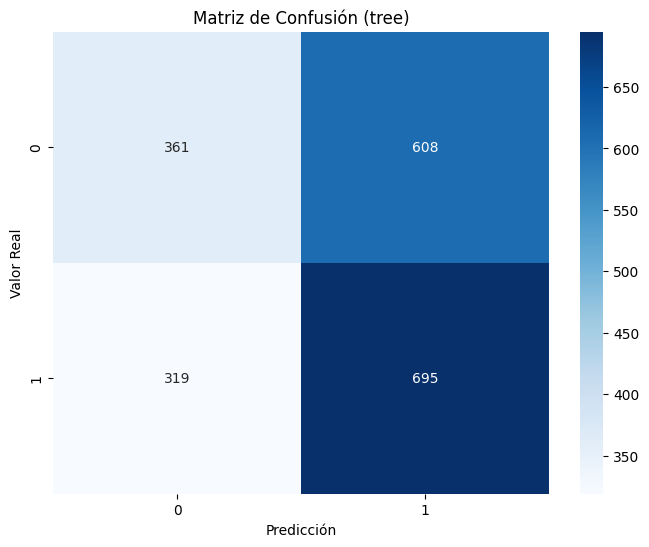

c:\Users\DELL\Git\modelo_clasificacion\src\soporte_logistica_ensamble.py:225: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=importancia_df, palette="viridis")


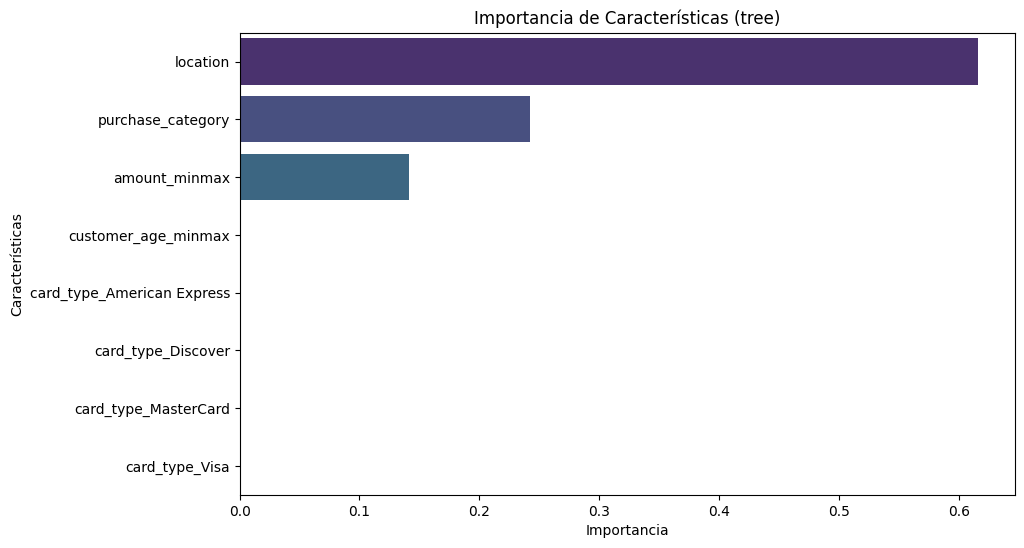

,train,test
accuracy,0.539586,0.532526
precision,0.541316,0.532162
recall,0.539586,0.532526
f1,0.529541,0.520716
kappa,0.075973,0.058339
auc,0.553816,0.523810
time_seconds,0.010748,NaN
n_jobs,8.000000,NaN
tiempo_computacion(segundos),NaN,0.010748
nucleos_usados,NaN,8.000000


In [125]:
# llamamos a la función para ajustar el modelo
logistica_2.ajustar_modelo("tree")
logistica_2.plot_matriz_confusion('tree')
logistica_2.importancia_predictores(modelo_nombre='tree')
# llamamos al metodo para obtener los resultaods de las predicciones
df_dectree_2 = logistica_2.calcular_metricas(modelo_nombre =  "tree" )
df_dectree_2.head().T

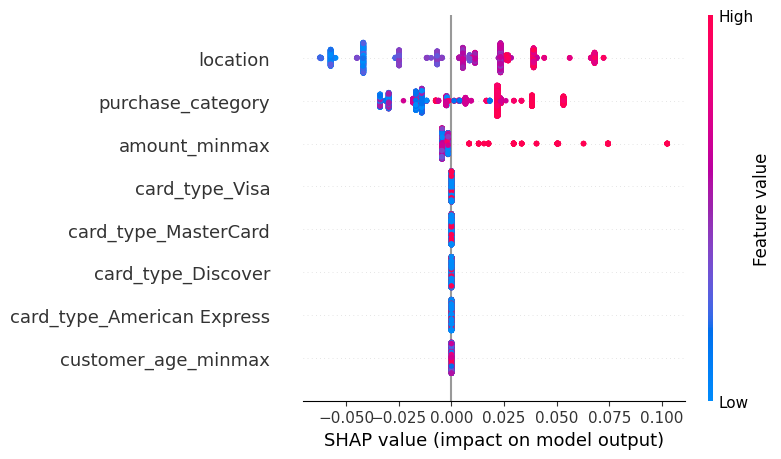

In [126]:
logistica_2.plot_shap_summary(modelo_nombre="tree")

In [70]:
logistica_2.resultados['tree']['mejor_modelo'].get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': None,
 'splitter': 'best'}

### Gradient Booster

C:\Users\DELL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


El mejor modelo es GradientBoostingClassifier(learning_rate=0.01, max_depth=4, min_samples_leaf=4,
                           subsample=0.8)


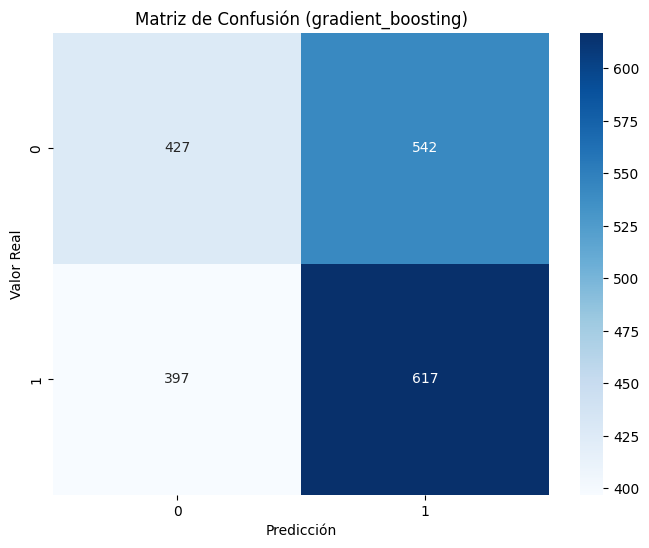

c:\Users\DELL\Git\modelo_clasificacion\src\soporte_logistica_ensamble.py:225: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=importancia_df, palette="viridis")


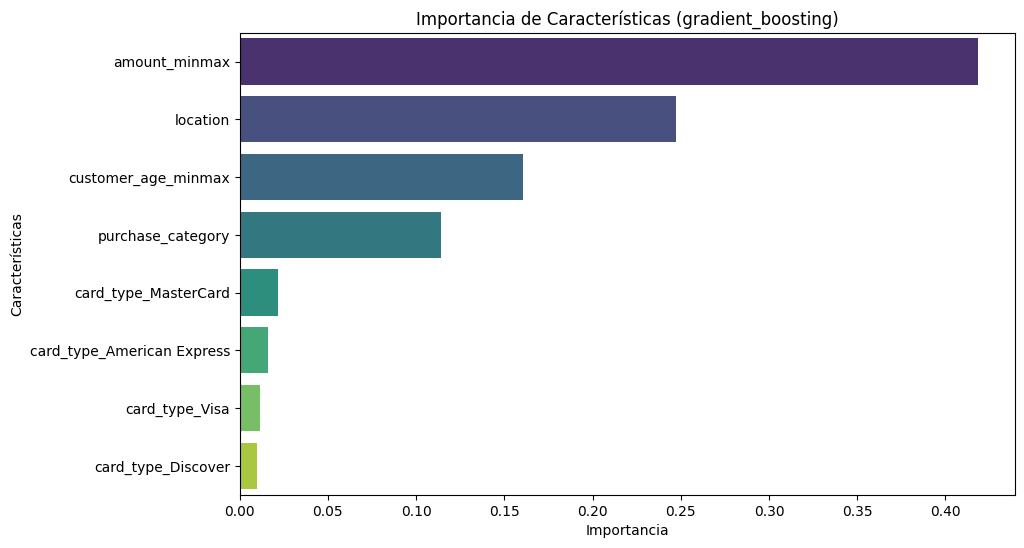

,accuracy,precision,recall,f1,kappa,auc,time_seconds,n_jobs,tiempo_computacion(segundos),nucleos_usados
train,0.570348,0.571136,0.570348,0.567642,0.139078,0.611976,0.027632,8.0,NaN,NaN
test,0.526475,0.525440,0.526475,0.523127,0.049305,0.535055,NaN,NaN,0.027632,8.0


In [72]:
logistica_2.ajustar_modelo("gradient_boosting")
logistica_2.plot_matriz_confusion('gradient_boosting')
logistica_2.importancia_predictores(modelo_nombre='gradient_boosting')
# llamamos al metodo para obtener los resultaods de las predicciones
df_gb_2 = logistica_2.calcular_metricas(modelo_nombre =  "gradient_boosting" )
df_gb_2.head()

Aquí se mejoran ligeramente las métricas para ambos grupos. Sin embargo son diferencias muy ligeras con otros.
- Puedo observar que el modelo ha aprendido ligeramente más a predecir los casos verdaderos ( accuracy).
- En relación con la precision y el recall, donde dad lugar a los falsos positivos y falsos negativos, donde no hay un acierto grande con las predicciones correctas ni las positivas (+).
- El kappa me dice que mantiene la aleatoriedad.

## XGB

El mejor modelo es XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=5, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)


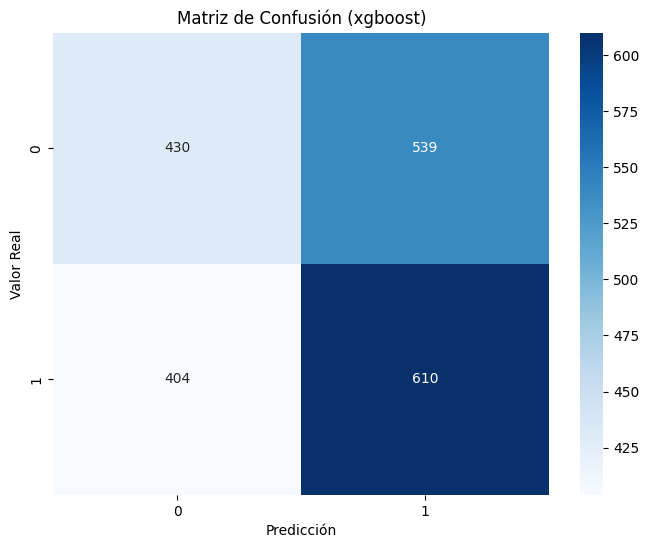

c:\Users\DELL\Git\modelo_clasificacion\src\soporte_logistica_ensamble.py:225: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=importancia_df, palette="viridis")


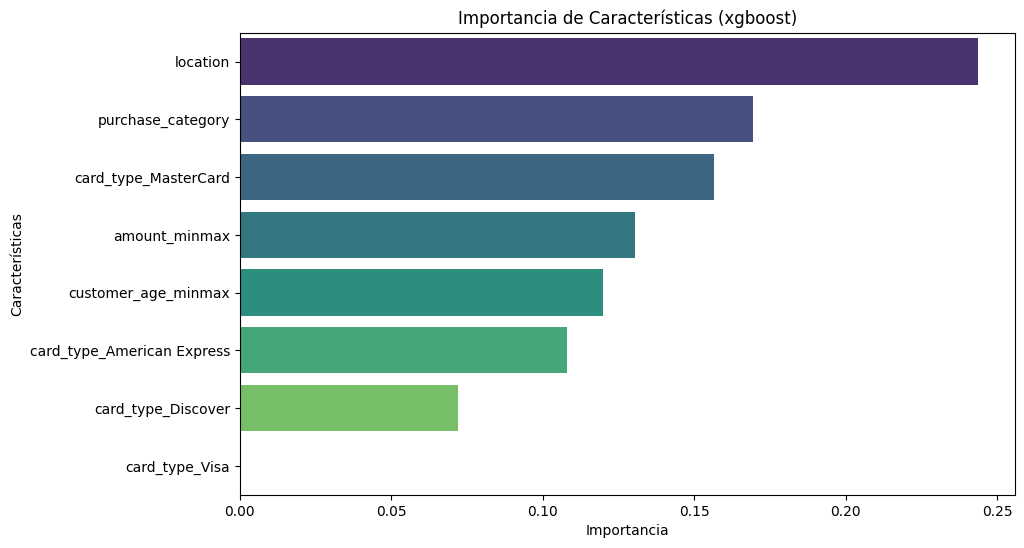

,accuracy,precision,recall,f1,kappa,auc,time_seconds,n_jobs,tiempo_computacion(segundos),nucleos_usados
train,0.549168,0.549408,0.549168,0.546490,0.096687,0.574124,0.011999,NaN,NaN,NaN
test,0.524458,0.523416,0.524458,0.521495,0.045475,0.533713,NaN,NaN,0.011999,NaN


In [73]:
logistica_2.ajustar_modelo("xgboost")
logistica_2.plot_matriz_confusion('xgboost')
logistica_2.importancia_predictores(modelo_nombre='xgboost')
# llamamos al metodo para obtener los resultaods de las predicciones
df_xgb_2 = logistica_2.calcular_metricas(modelo_nombre =  "xgboost" )
df_xgb_2.head()

In [112]:
df_xgb_2['modelo'] = 'xgboost'
df_gb_2['modelo'] = 'gradient_boosting'
df_lg_2['modelo'] = 'regresion logistica'
df_dectree_2['modelo'] = 'decision tree'
df_resultados_rf_2['modelo'] = 'random_forest'

In [113]:
df_lg_2

,accuracy,precision,recall,f1,kappa,auc,time_seconds,n_jobs,tiempo_computacion(segundos),nucleos_usados,modelo
train,0.534796,0.534669,0.534796,0.532421,0.068013,0.548724,0.003199,NaN,NaN,NaN,regresion logistica
test,0.528492,0.527592,0.528492,0.526067,0.053877,0.545605,NaN,NaN,0.003199,NaN,regresion logistica


In [114]:
df_modelos = pd.concat([df_lg_2, df_dectree_2, df_resultados_rf_2, df_gb_2, df_xgb_2])

In [118]:
df_modelos
df_modelos.reset_index(drop=True, inplace=True)
df_concatenado = df_modelos.style.apply(sle.color_filas_por_modelo, axis=1)


In [119]:
df_modelos

,accuracy,precision,recall,f1,kappa,auc,time_seconds,n_jobs,tiempo_computacion(segundos),nucleos_usados,modelo
0,0.534796,0.534669,0.534796,0.532421,0.068013,0.548724,0.003199,NaN,NaN,NaN,regresion logistica
1,0.528492,0.527592,0.528492,0.526067,0.053877,0.545605,NaN,NaN,0.003199,NaN,regresion logistica
2,0.539586,0.541316,0.539586,0.529541,0.075973,0.553816,0.006932,8.0,NaN,NaN,decision tree
3,0.532526,0.532162,0.532526,0.520716,0.058339,0.523810,NaN,NaN,0.006932,8.0,decision tree
4,0.542990,0.544410,0.542990,0.535063,0.083143,0.563501,0.018591,NaN,NaN,NaN,random_forest
5,0.523954,0.522659,0.523954,0.514405,0.041799,0.530230,NaN,NaN,0.018591,NaN,random_forest
6,0.570348,0.571136,0.570348,0.567642,0.139078,0.611976,0.027632,8.0,NaN,NaN,gradient_boosting
7,0.526475,0.525440,0.526475,0.523127,0.049305,0.535055,NaN,NaN,0.027632,8.0,gradient_boosting
8,0.549168,0.549408,0.549168,0.546490,0.096687,0.574124,0.011999,NaN,NaN,NaN,xgboost
9,0.524458,0.523416,0.524458,0.521495,0.045475,0.533713,NaN,NaN,0.011999,NaN,xgboost


In [120]:
df_concatenado

,accuracy,precision,recall,f1,kappa,auc,time_seconds,n_jobs,tiempo_computacion(segundos),nucleos_usados,modelo
0,0.534796,0.534669,0.534796,0.532421,0.068013,0.548724,0.003199,nan,nan,nan,regresion logistica
1,0.528492,0.527592,0.528492,0.526067,0.053877,0.545605,nan,nan,0.003199,nan,regresion logistica
2,0.539586,0.541316,0.539586,0.529541,0.075973,0.553816,0.006932,8.000000,nan,nan,decision tree
3,0.532526,0.532162,0.532526,0.520716,0.058339,0.523810,nan,nan,0.006932,8.000000,decision tree
4,0.542990,0.544410,0.542990,0.535063,0.083143,0.563501,0.018591,nan,nan,nan,random_forest
5,0.523954,0.522659,0.523954,0.514405,0.041799,0.530230,nan,nan,0.018591,nan,random_forest
6,0.570348,0.571136,0.570348,0.567642,0.139078,0.611976,0.027632,8.000000,nan,nan,gradient_boosting
7,0.526475,0.525440,0.526475,0.523127,0.049305,0.535055,nan,nan,0.027632,8.000000,gradient_boosting
8,0.549168,0.549408,0.549168,0.546490,0.096687,0.574124,0.011999,nan,nan,nan,xgboost
9,0.524458,0.523416,0.524458,0.521495,0.045475,0.533713,nan,nan,0.011999,nan,xgboost


Mi mejor modelo:
- Considerando todos mis modelos realizados, y que ninguno tuvo métricas positivas a resaltar, pienso que debemos apuntar a señalar los dos más importantes: regresión logística y decision tree. 
    - En cuanto a los datos arrojados para la precision, accuracy y recall; ninguno resalta de manera grandiosa por encima de los otros ya que sí hay algunos que en el grupo train arrojan mejores estadísticas estas no se ven reflejadas en el grupo test. Por ende, me dirijo a los dos aquellos mencionados que poseen métricas que se mantienen sin overfitting/underfitting. 
    - Considerando la aleatoriedad (kappa), la diferencia entre estas dos columnas es apenas significativa por lo que queda a discresión. Sin embargo, el tiempo de computación para la regresión logística en incluso menor a la mitad del decision tree. Por eso prefiero quedarme con este modelo.

In [122]:
df_dectree_2['kappa']

train    0.075973
test     0.058339
Name: kappa, dtype: float64

In [123]:
df_lg_2['kappa']

train    0.068013
test     0.053877
Name: kappa, dtype: float64